## 13. Лабораторная работа «Решение задач кластеризации»

Dataset: [Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score
from itertools import cycle
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [3]:
header = ["Sepal length", "Sepal width", "Petal length", "Petal width", "Class"]
data = pd.read_csv("iris.data", names=header, index_col=None)
data["Class"] = data["Class"].astype("category")
data.sample(5)

,Sepal length,Sepal width,Petal length,Petal width,Class
97,6.2,2.9,4.3,1.3,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa


In [4]:
display(data.describe())

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
n_clusters = len(data["Class"].unique())

X = data.drop(columns=["Class"]).copy()
X_std = StandardScaler().fit_transform(X)

km = KMeans(n_clusters=n_clusters)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
def draw_plot(km, X, classes):
    centroids = km.cluster_centers_
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = cycle(['lightgreen', 'blue', 'orange'])
    for i, color in zip(np.unique(km.labels_), colors):
        plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1],
            c=color, label=classes[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100,
            c='red', label='centroid')
    plt.legend()
    lim = [-X.max()*1.2, X.max()*1.2]
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel('Eruption time in mins')
    plt.ylabel('Waiting time to next eruption')
    plt.title('Visualization of clustered data', fontweight='bold')
    ax.set_aspect('equal')

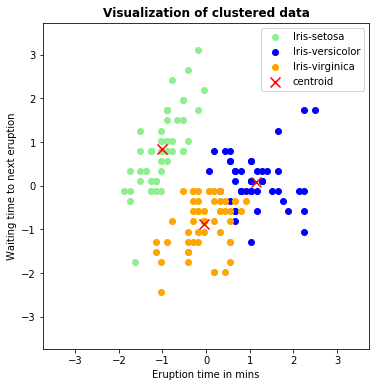

In [9]:
draw_plot(km, X_std, data["Class"].unique())

Оценка качества

In [10]:
y = data["Class"].copy()
scores = [{
    'ARI': adjusted_rand_score(y, km.labels_),
    'AMI': adjusted_mutual_info_score(y, km.labels_),
    'Homogenity': homogeneity_score(y, km.labels_),
    'Completeness': completeness_score(y, km.labels_),
    'V-measure': v_measure_score(y, km.labels_),
    'Silhouette': silhouette_score(X_std, km.labels_)
}]
columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure', 'Silhouette']
pd.DataFrame(data=scores, columns=columns, index=["KMeans"])

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.620135,0.655223,0.659127,0.659848,0.659487,0.458972
